# Investigate sin/cos representation

In [1]:
import os, sys
import itertools

from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

###

SRC_DIR = os.path.join(
    os.path.dirname(os.getcwd()), "protdiff"
)
assert os.path.isdir(SRC_DIR)
sys.path.append(SRC_DIR)
import datasets
from plotting import PLOT_DIR

In [2]:
dset = datasets.CathConsecutiveAnglesDataset(pad=512)
len(dset)

15224

In [3]:
dset.feature_names['angles_sin_cos']

['bond_dist',
 'omega_sin',
 'theta_sin',
 'phi_sin',
 'omega_cos',
 'theta_cos',
 'phi_cos']

In [4]:
dset[0].keys()

dict_keys(['angles', 'angles_sin_cos', 'attn_mask', 'position_ids'])

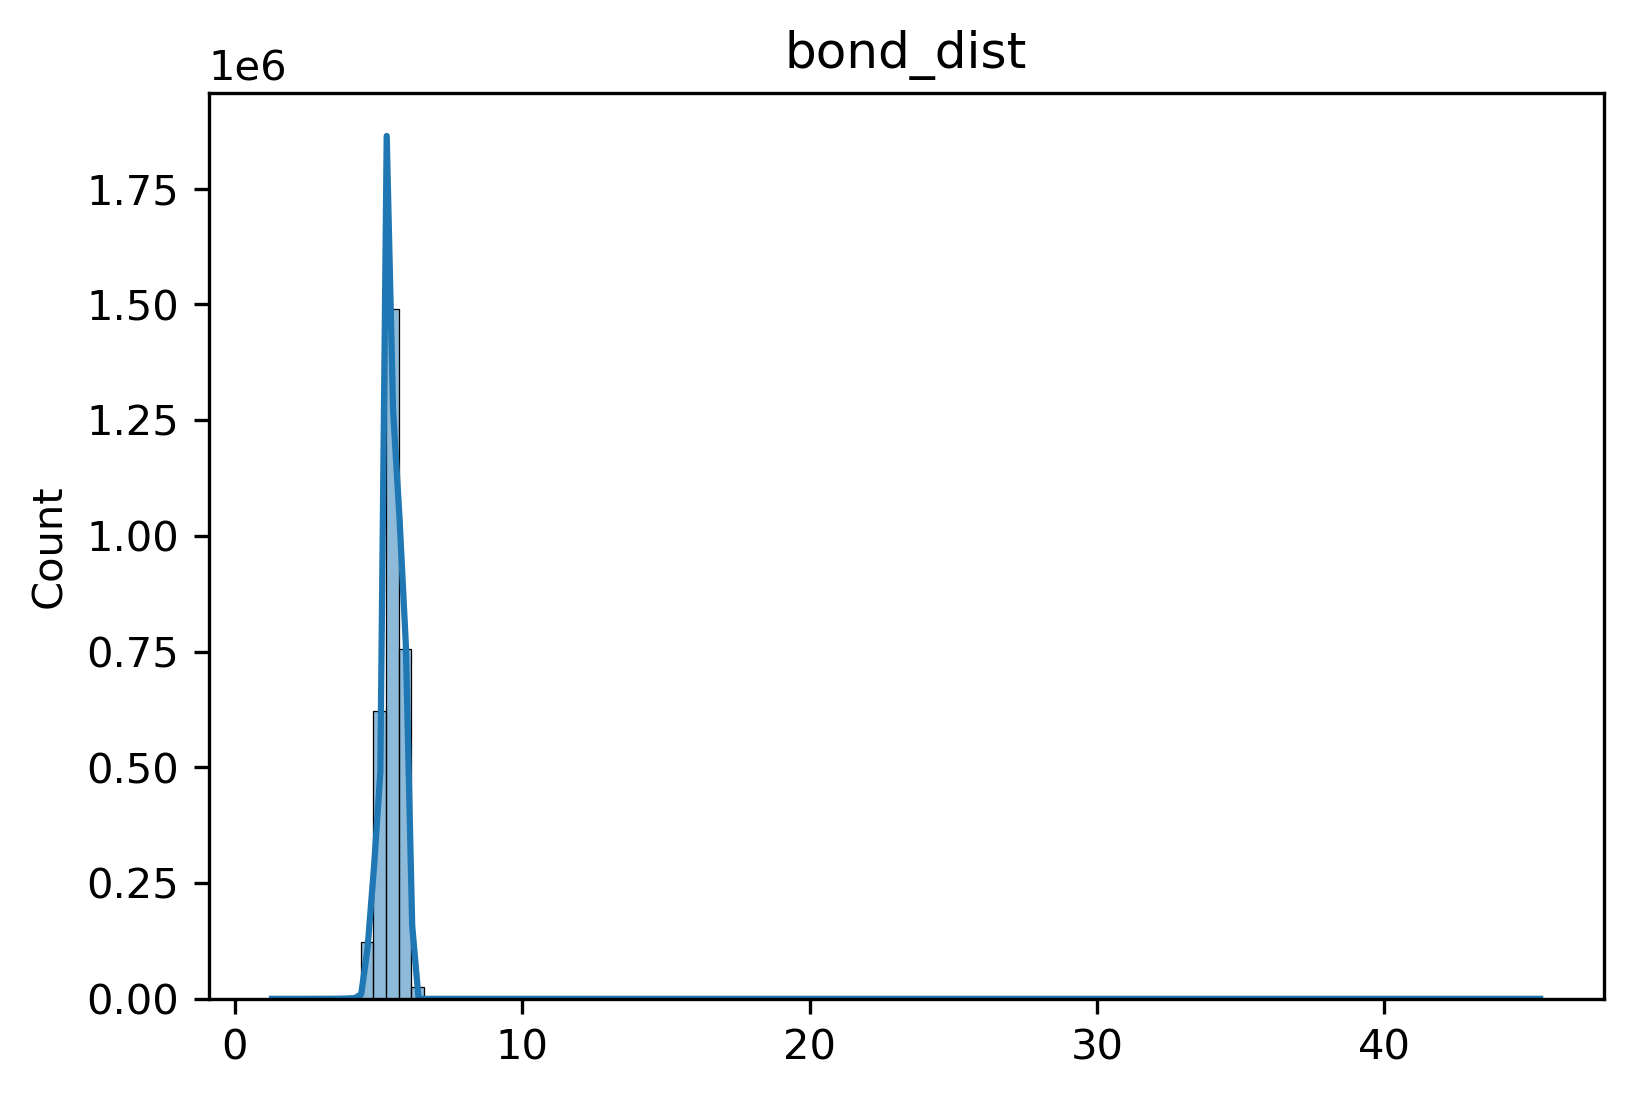

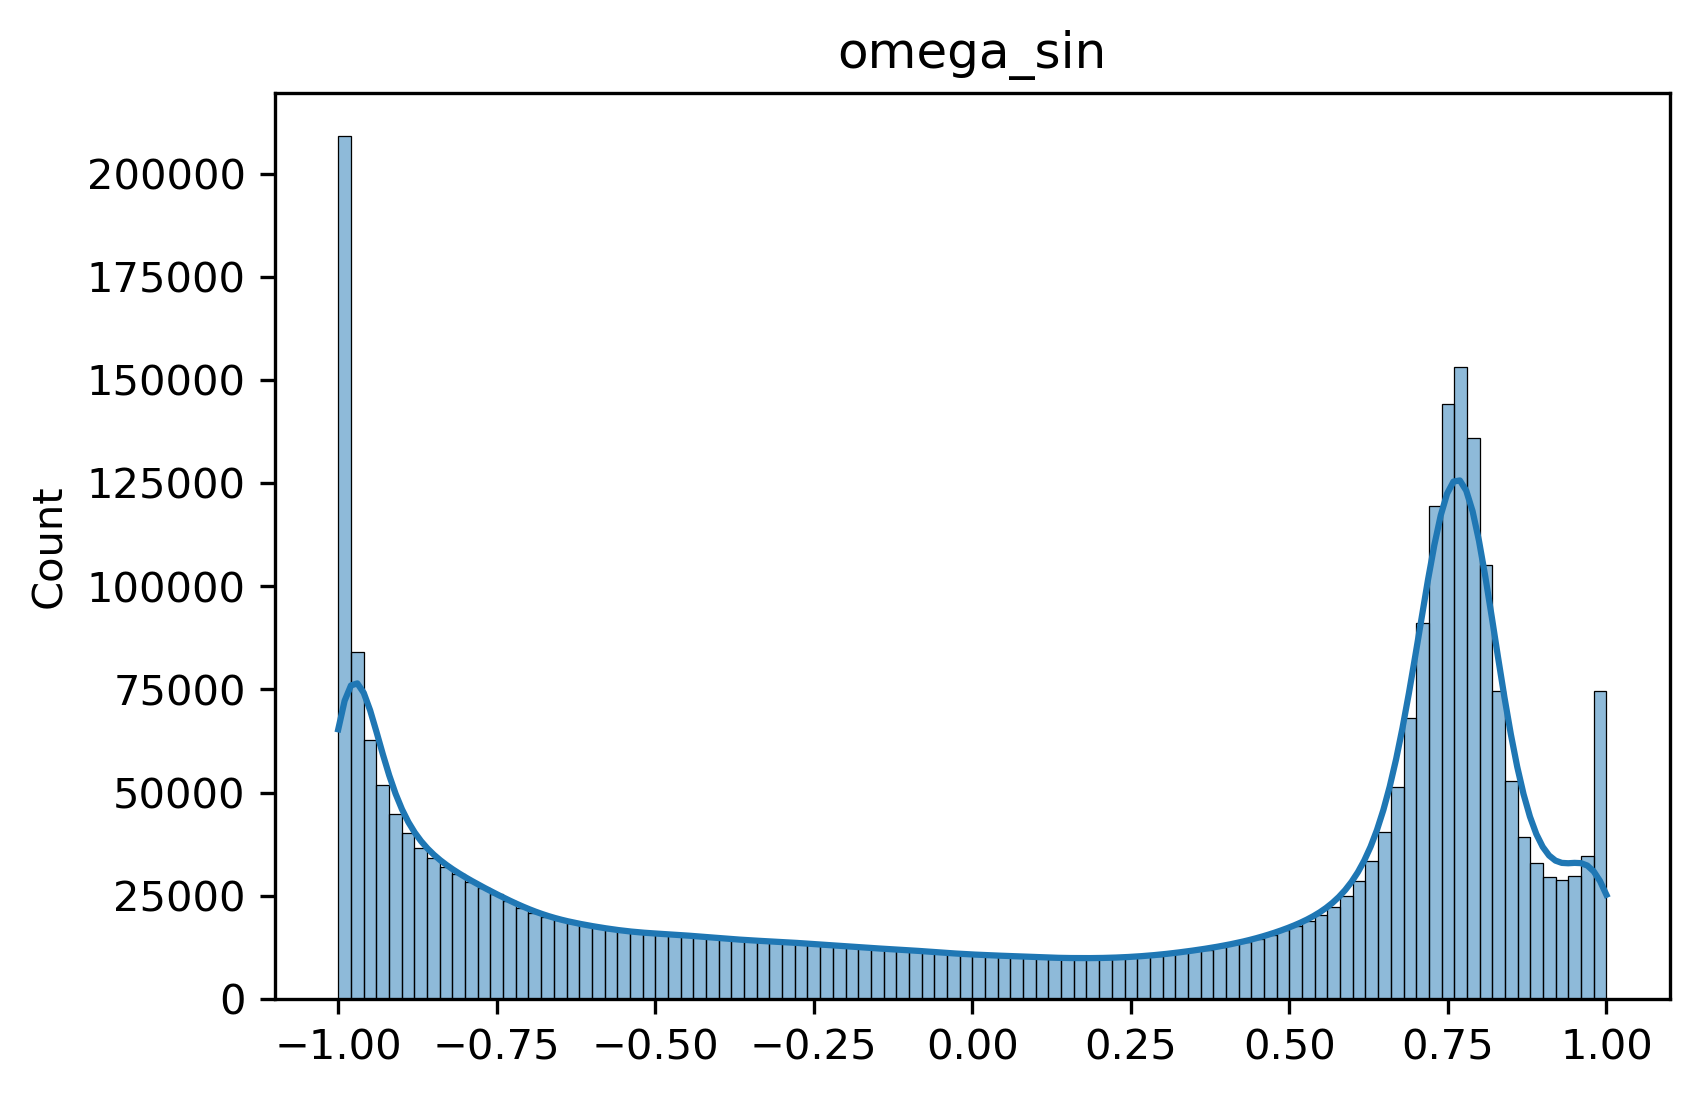

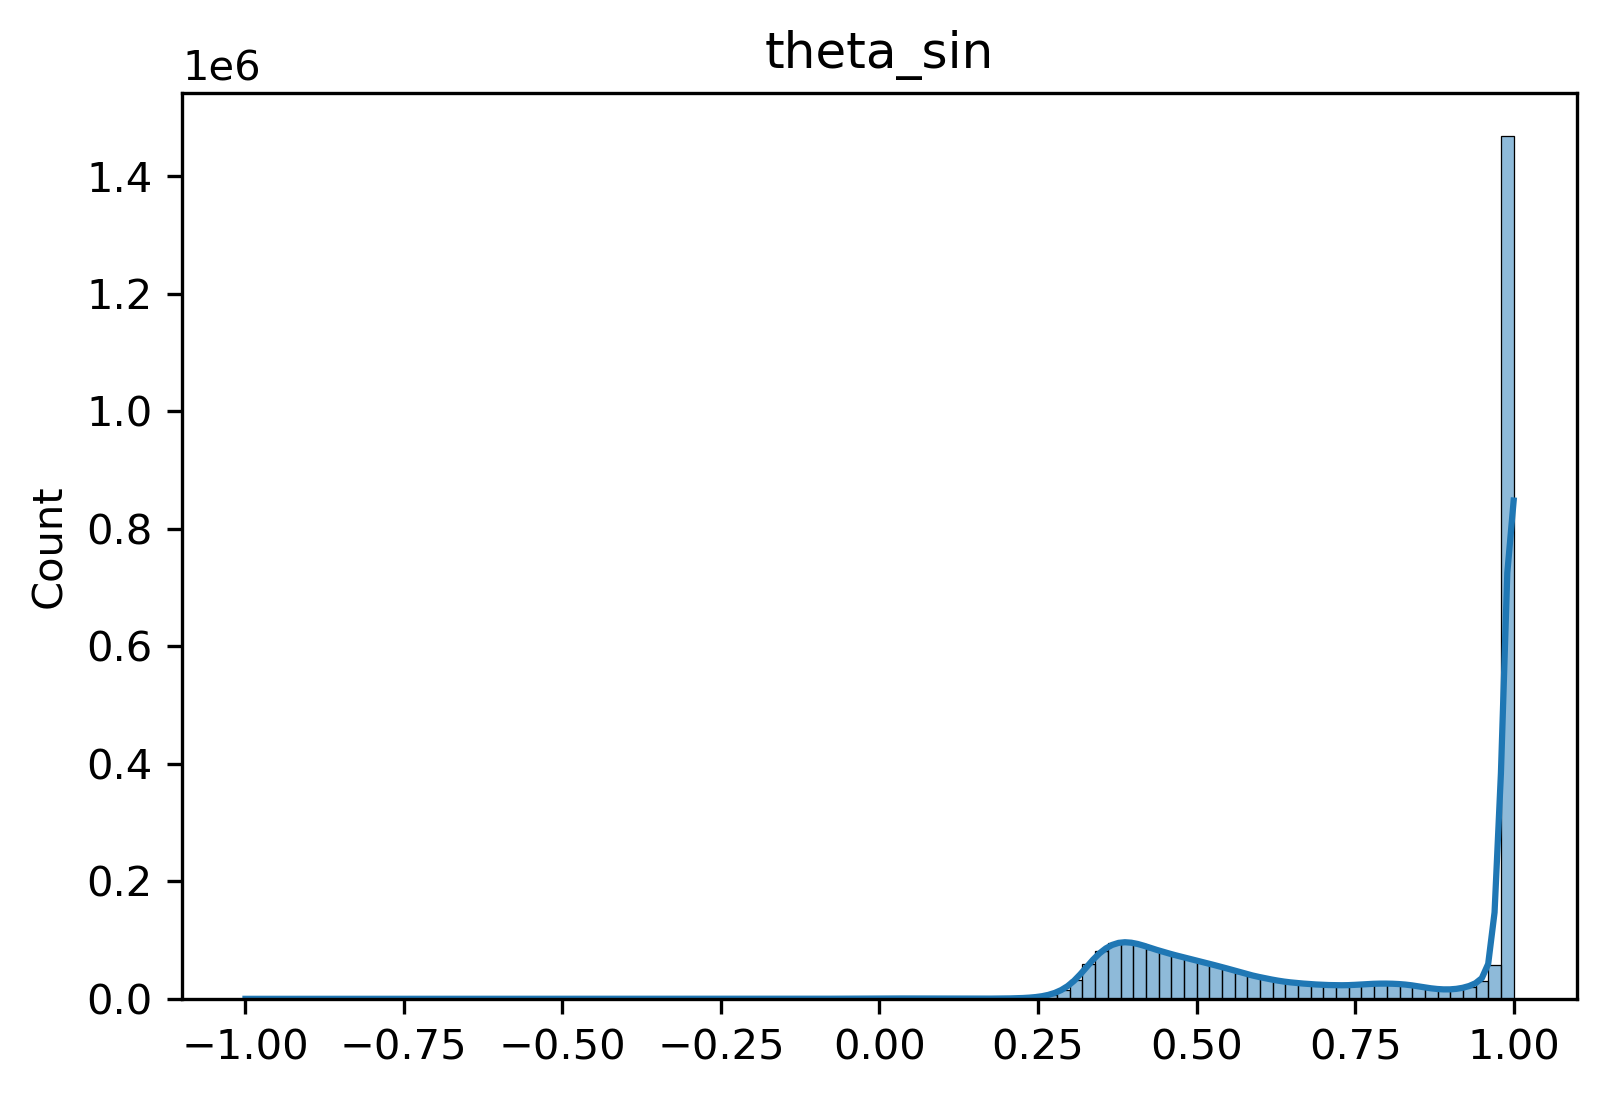

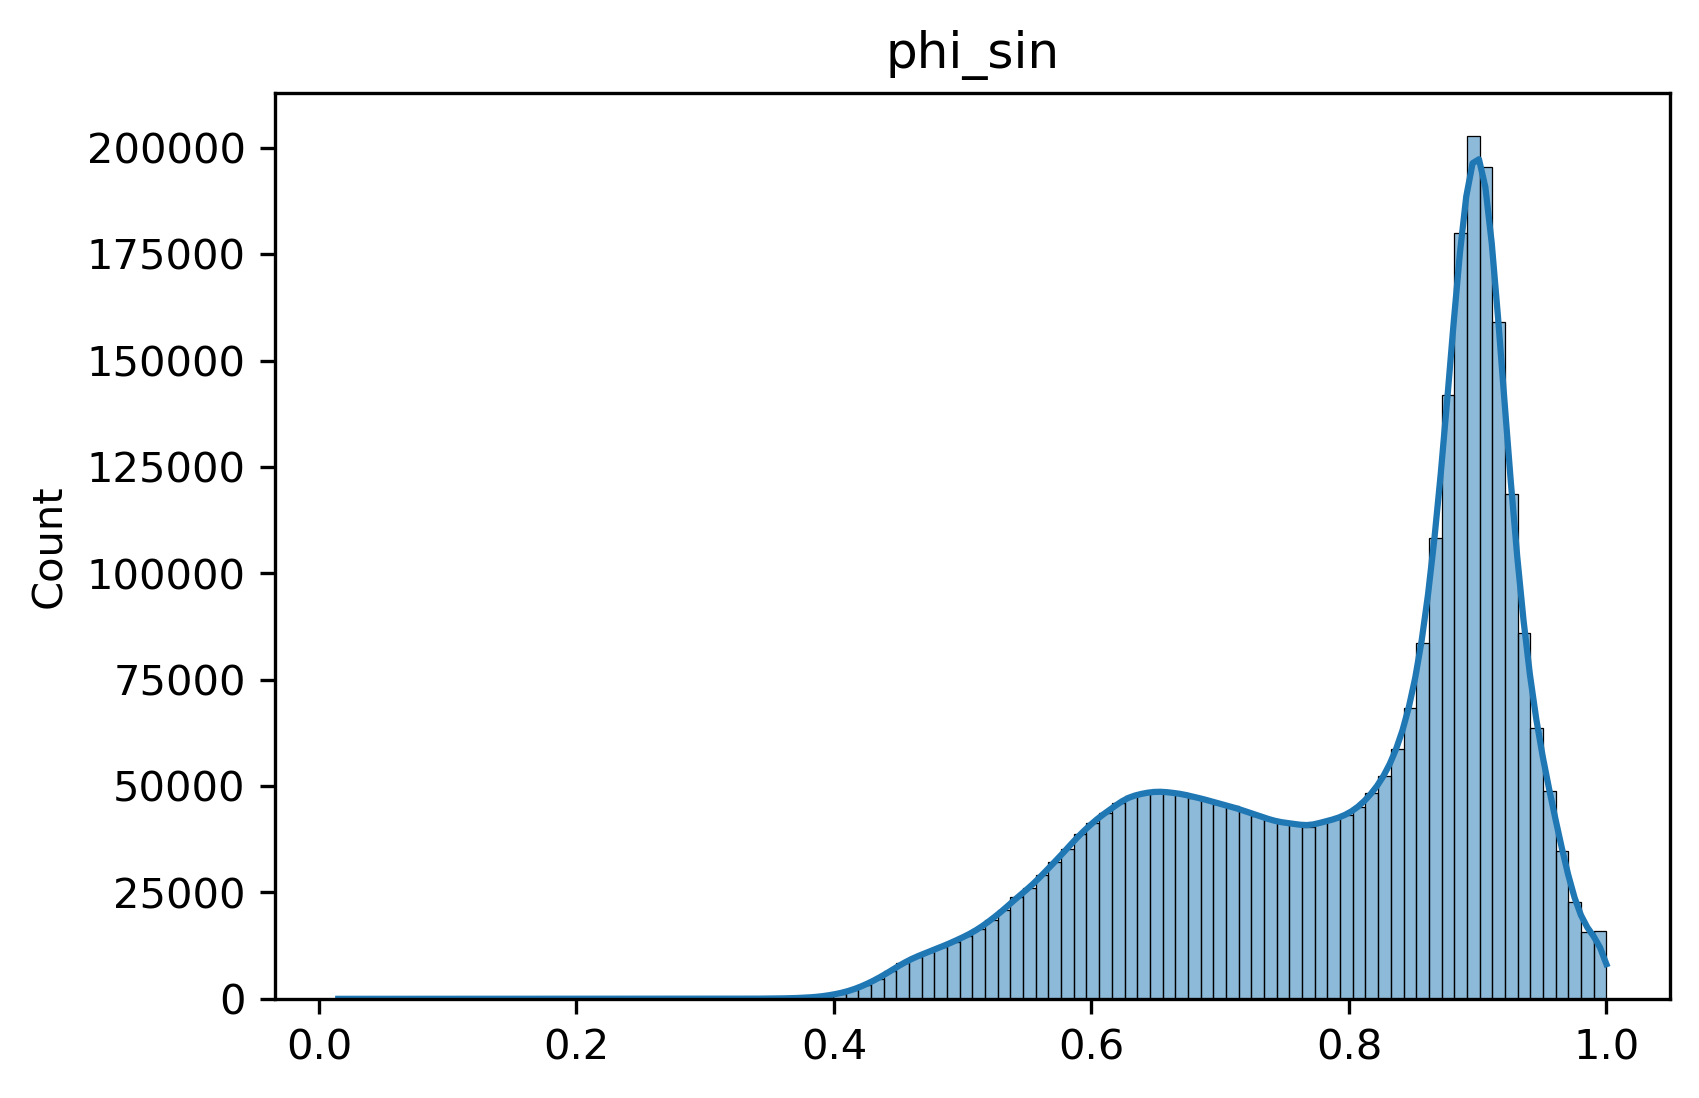

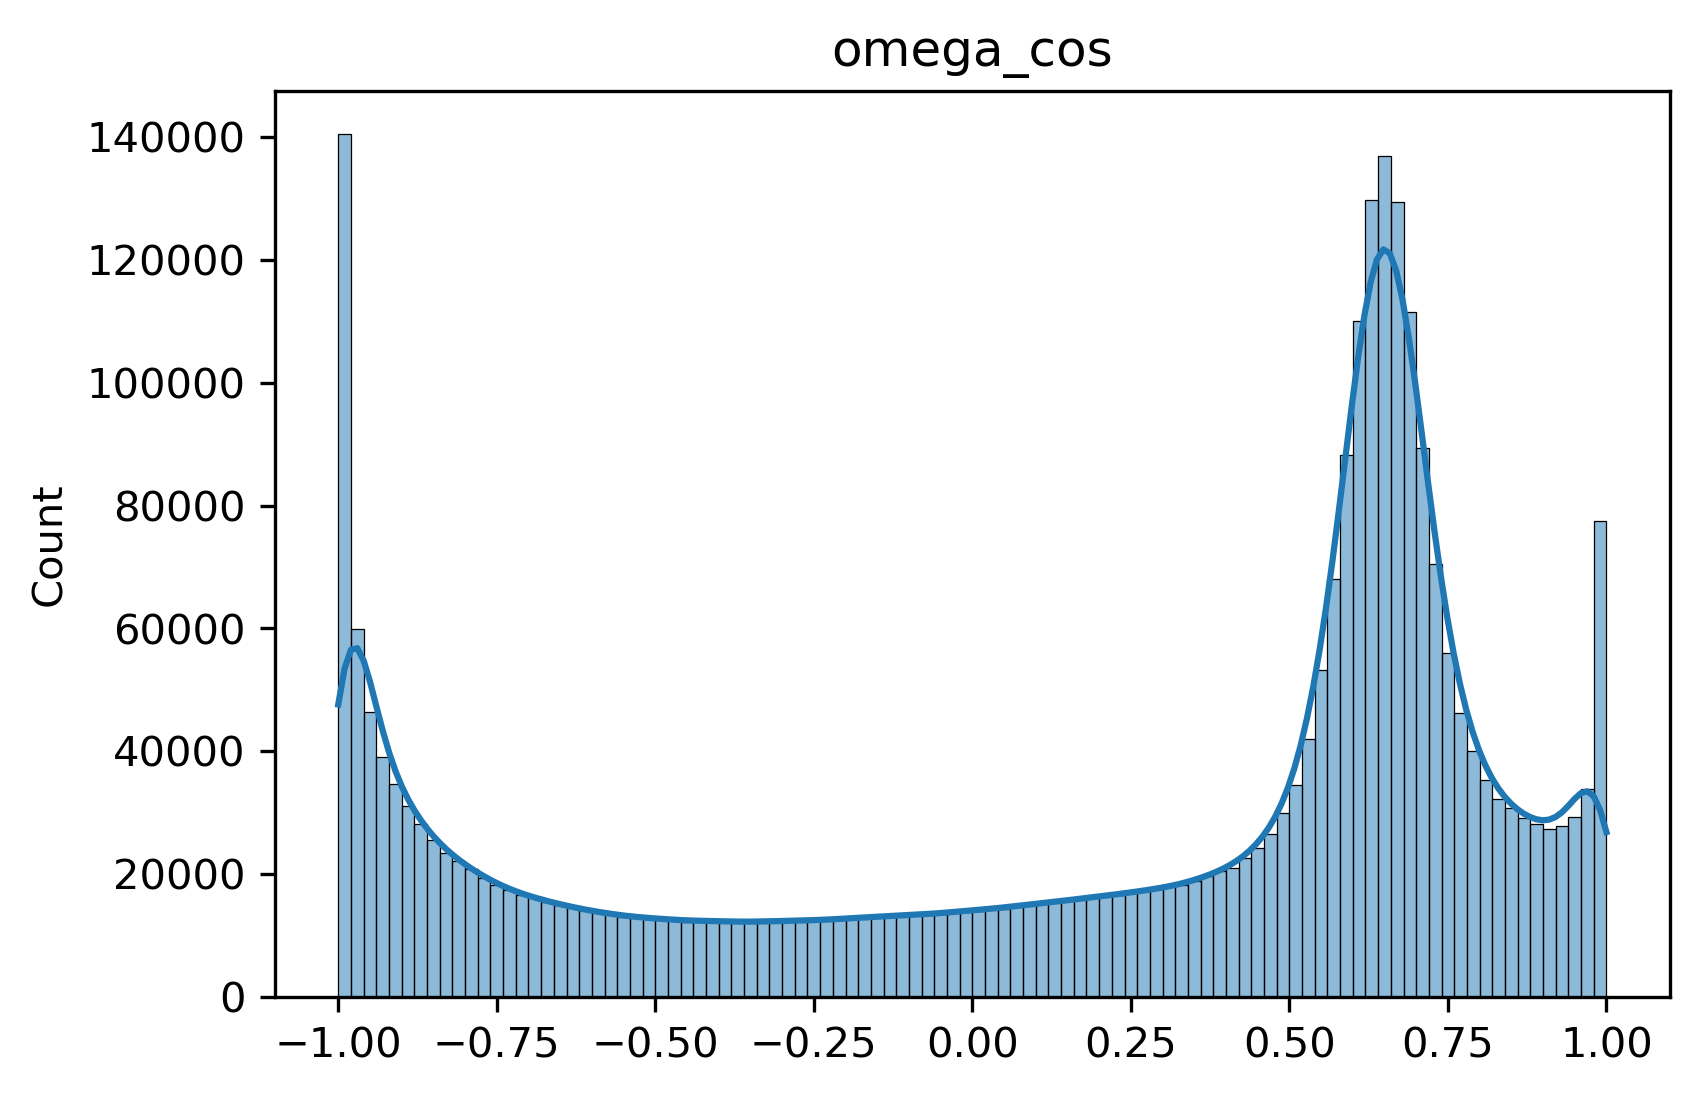

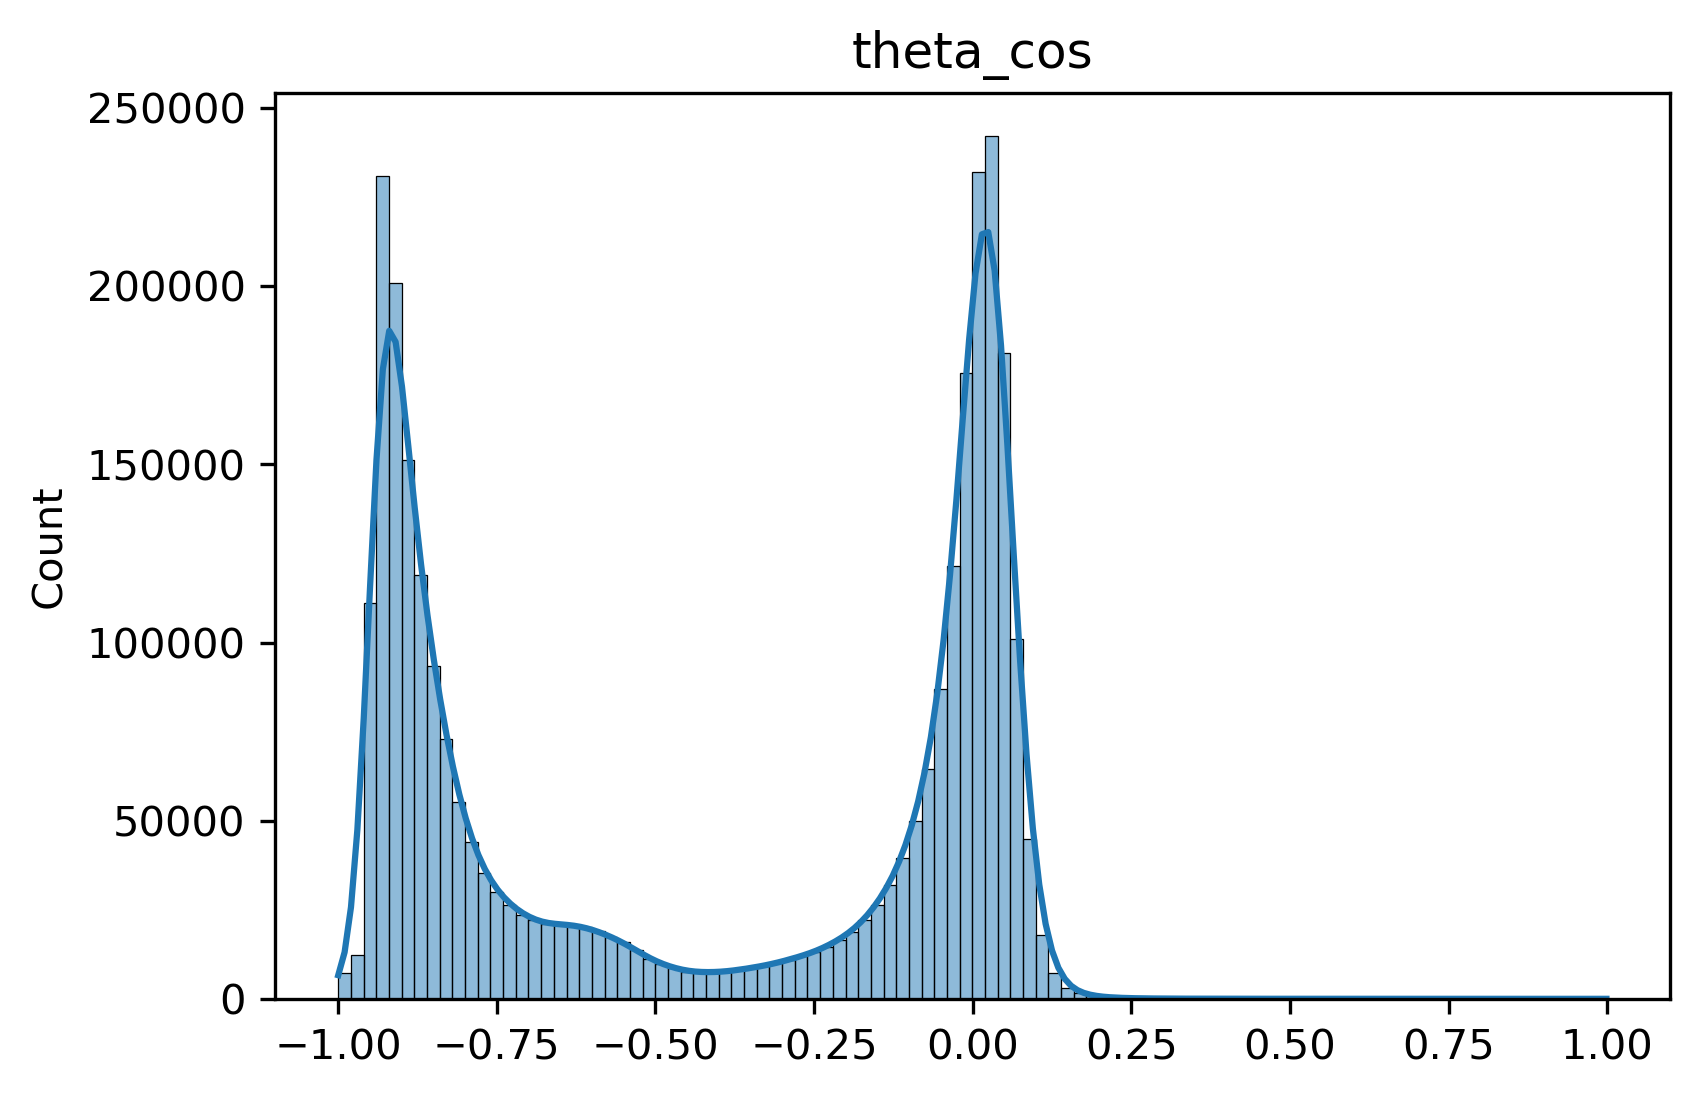

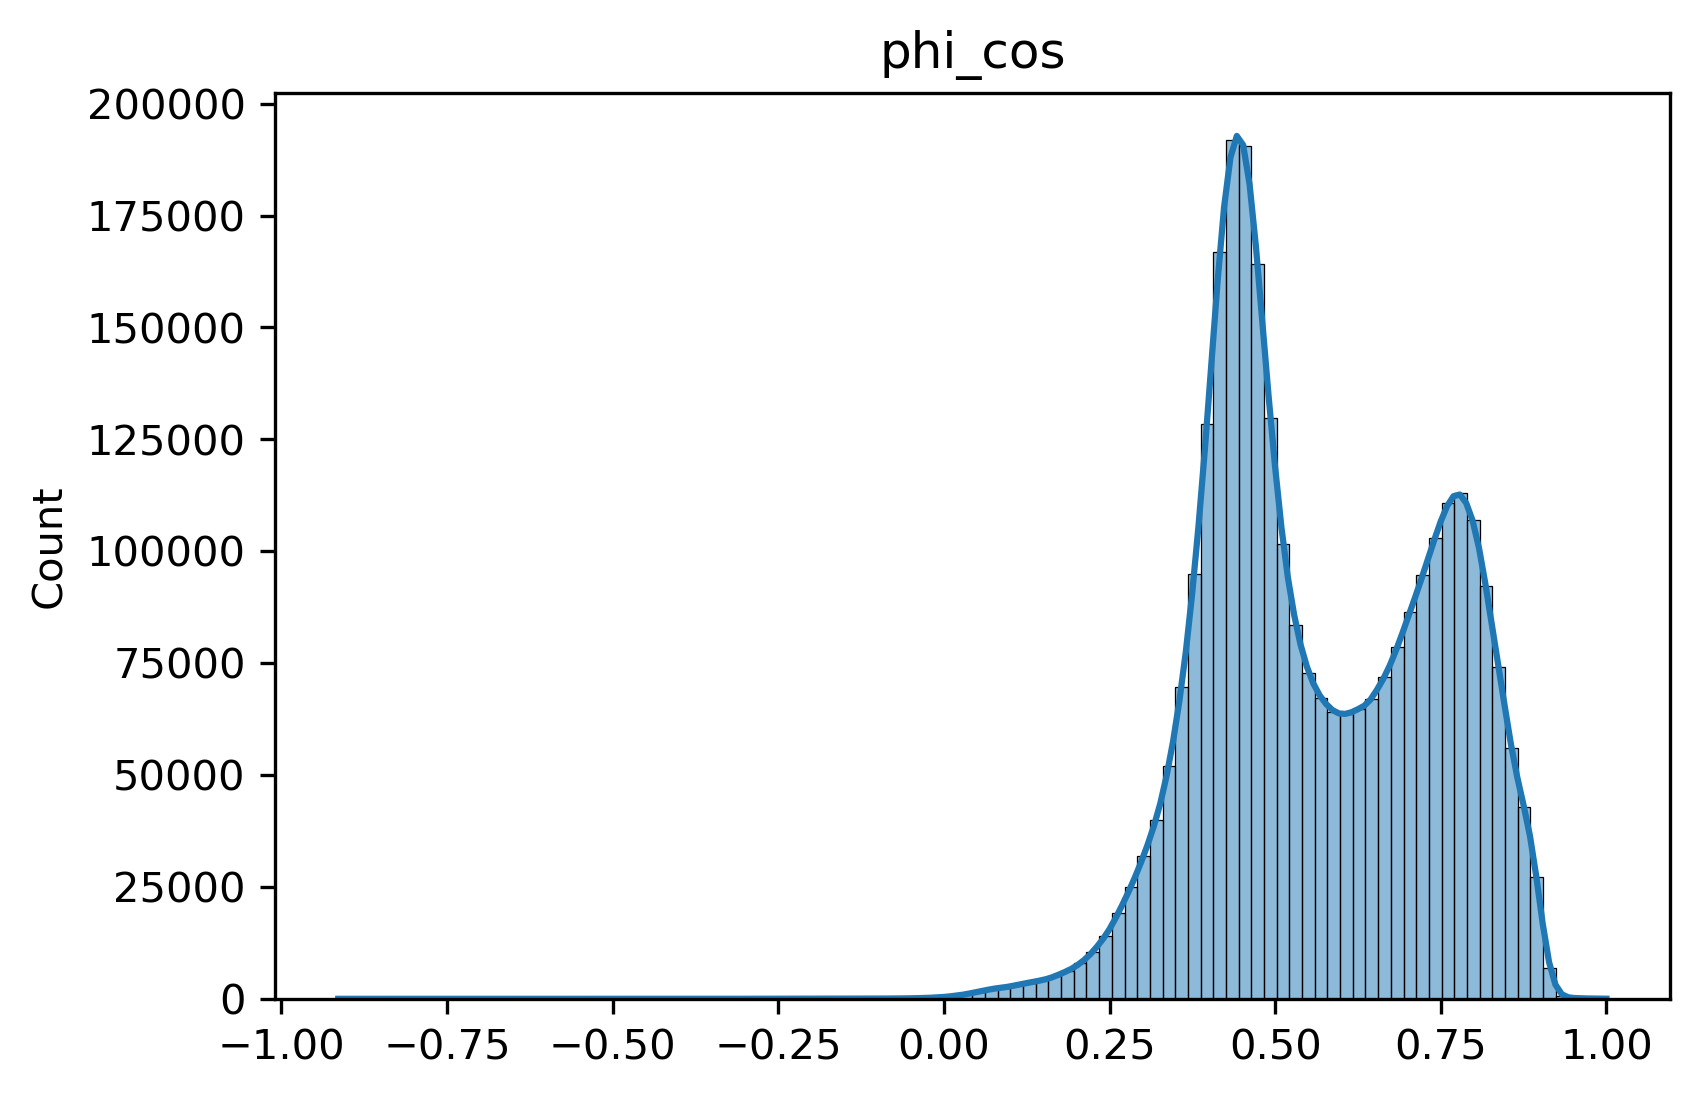

In [5]:
def plot_feature_distribution(dset, feature_set:str = "angles_sin_cos"):
    for ft_idx, feature_name in enumerate(dset.feature_names[feature_set]):
        vals = []
        for i in range(len(dset)):
            v = dset[i][feature_set][:, ft_idx]
            # select by attn
            attn_idx = torch.where(dset[i]['attn_mask'])[0]
            vals.extend(v[attn_idx].numpy().tolist())

        fig, ax = plt.subplots(dpi=300)
        sns.histplot(vals, ax=ax, bins=100, kde=True)
        ax.set(
            title=f"{feature_name}",
        )
        fig.show()

plot_feature_distribution(dset)